# Customer Churn Predictor

### Business Understanding

#### **Problem Statement** Telco, a telecommunications company, aims to enhance its customer retention strategies by predicting customer churn. 
#### Churn refers to customers discontinuing their service within a specified period.
#### By identifying patterns and factors that contribute to customer churn, Telco can implement targeted interventions to improve customer retention

#### **Stakeholders:**
     - Chief Marketing Officer (CMO) Telco
     - Customer Service Director Telco
     - Chief Data Officer (CDO) Telco
     
#### **Key Metrics and Success Criteria**
     1. Acuracy-The Model should have an accuracy score of 85% (On balanced data).Good models are expected to have an accuracy score of >0.80 or 80%
     2. Threshold for precision and Recall - The model should achieve a precision and recall at least 80%. This assures that the model is reliable in predicting churn and identifying most of the actual churn 
     3. Minimum F1 Score- The F1 score should be atleast 0.75. This balances the trade offs between precision and recalls, indicating the model performs well even if the class distribution is imbalanced
     4. AUC-ROC Score- This should be atleast 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and not churn customers 
     5. Confusion Matrix - The number of False Negatives (FN) should be lower to ensure that most of the churn cases are identified
     6. Lift and Gain-The lift value at the top decile (top ten of predicted probabilities) sould be significantly higher than 1 indicating that the model effectively high risk of churn customers 

   


#### Features
    - CustomerID -- A unique customer identification
    
    - Gender -- Whether the customer is a male or a female

    -SeniorCitizen -- Whether a customer is a senior citizen or not

    -Partner -- Whether the customer has a partner or not (Yes, No)

    -Dependents -- Whether the customer has dependents or not (Yes, No)

    -Tenure -- Number of months the customer has stayed with the company

    -Phone Service -- Whether the customer has a phone service or not (Yes, No)

    -MultipleLines -- Whether the customer has multiple lines or not

    -InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

    -OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

    -OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

    -DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

    -TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

    -StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

    -StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

    -Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

    -PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

    -Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

    -MonthlyCharges -- The amount charged to the customer monthly

    -TotalCharges -- The total amount charged to the customer

    -Churn -- Whether the customer churned or not (Yes or No)

#### **Null Hypothesis**
 (HO) There is a significant difference in churn rates among customers with different contract types.

#### **Alternative Hpothesis**
(H1) There is no significant difference in churn rates among customers with different contract types.

#### Analytical Questions
    1. What is the Churn percentage based on the paymment method
    2. How does key demographic factors (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') influence customer churn?
    3. How does the tenure of a customer impact their likelihood of churning?
    4. Is there a significant correlation between the type of internet service and customer churn?
    5. Do customers with multiple services (e.g., phone service, internet service) show different churn rates compared to those with  fewer services?
    6. How do different contract types affect customer churn rates?
   
    


    
    


### Data Understanding

#### **Importations**

In [1]:
# Data Manipulation Packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pyodbc
from dotenv import dotenv_values
import scipy.stats as stats
import warnings



warnings.filterwarnings('ignore')



#### **Load Datasets**

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values (r'C:\Users\Admin\OneDrive\OneDrive-Azubi\Customer-Churn-Prediction-\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get('SERVER')
database = environment_variables.get('DATABASE')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


connection = pyodbc.connect(connection_string)

In [3]:
# Loading the First 3000 dataset
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [5]:
# Loading the second 2000 data
df=pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Merge the Train Datasets**

In [8]:
# Combine DataFrames
churn_prime = pd.concat([data, df], ignore_index=True)

churn_prime.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
# Covert all True to 'Yes' and False to 'No' for a good data consistency and analysis

churn_prime.replace(True, 'Yes', inplace=True)
churn_prime.replace(False, 'No', inplace=True)

churn_prime.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [10]:
# Change TotalCharge  datatype to float 

churn_prime['TotalCharges'] = pd.to_numeric(churn_prime['TotalCharges'], errors='coerce')

#### **Exploratory Data Analyis (EDA)**

 - Data Quality Assessment & Exploring data 

In [11]:
churn_prime.shape

(5043, 21)

In [12]:
churn_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
# Checking for duplicates 
churn_prime.duplicated().sum() 

0

In [14]:
# Missing values with their percentages 
churn_prime.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(churn_prime)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


In [15]:
#Statistical  Analysis of numeric values

churn_prime.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [16]:
# Overview Analysis of categorical columns 

churn_prime.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231
DeviceProtection,4392,3,No,2219


In [17]:
# Columns in our combined dataset 

columns= churn_prime.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# Unique values in each column

for column in columns:
    print(f'{column}')
    print(f'There are {churn_prime[column].unique().size} unique values')
    print(f'These are {churn_prime[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 4 unique values
These are [None 'No' 'Yes' 'No phone service']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 4 unique values
These are ['No' 'Yes' None 'No internet service']
OnlineBackup
There are 4 unique values
These

#### **Univariate Analysis**


* For the numerical columns - we used a histogram to see the ditribution of our data and we realised it's unevenly distributed with 3 graphs being bimodal instead of havig one curve like a bell shape  and the total churge being unimodal with a long tail

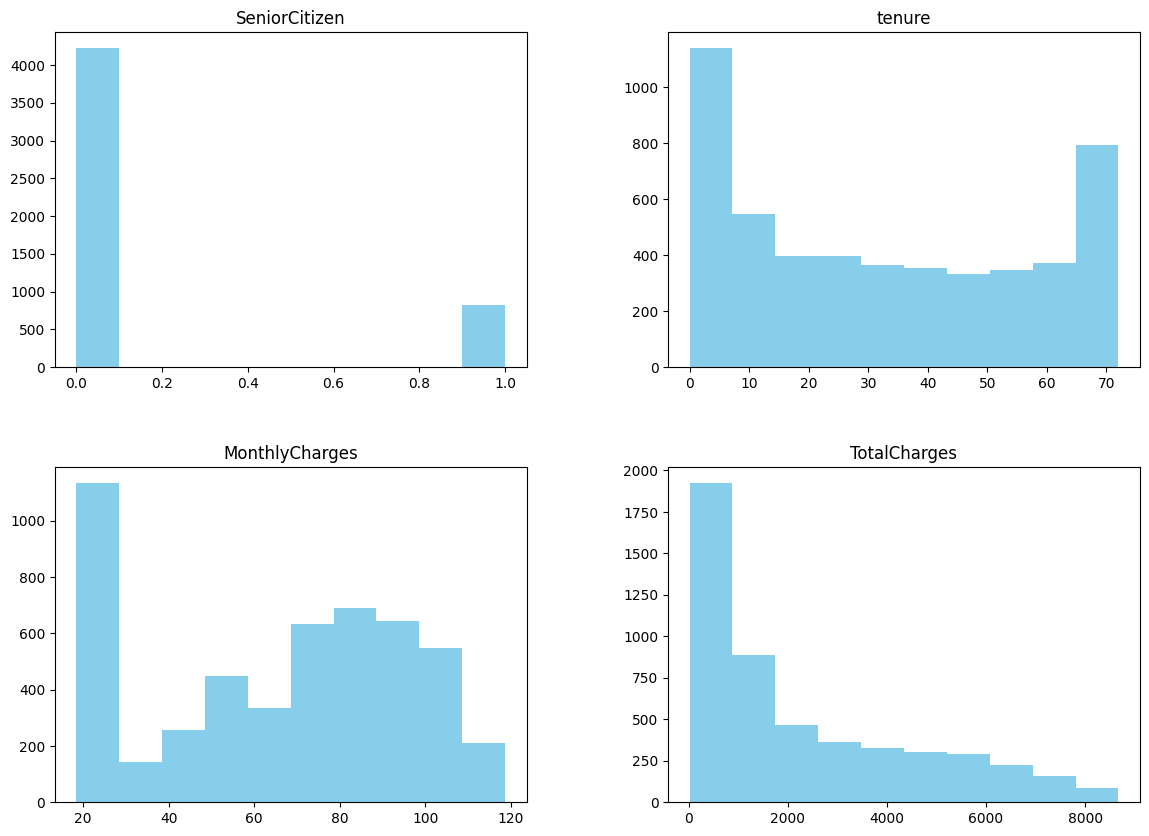

In [19]:
# Distribution of Numerical Feature
churn_prime.hist(figsize= (14,10),grid=False, color='skyblue')
plt.show()

* Checking for outliers 

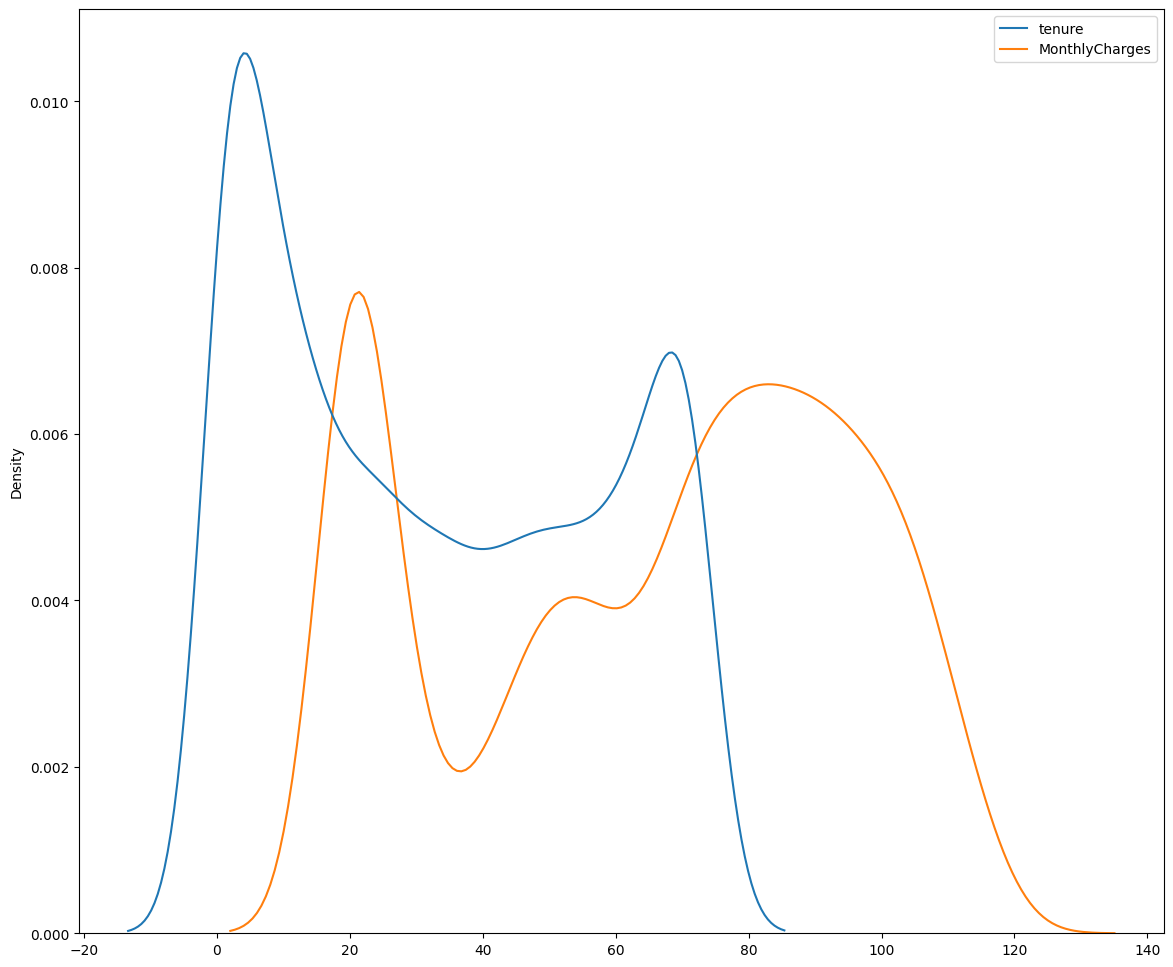

In [20]:
# Create a figure with the specified size
plt.figure(figsize=(14,12))
sns.kdeplot(churn_prime.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
plt.grid(False)
plt.show()

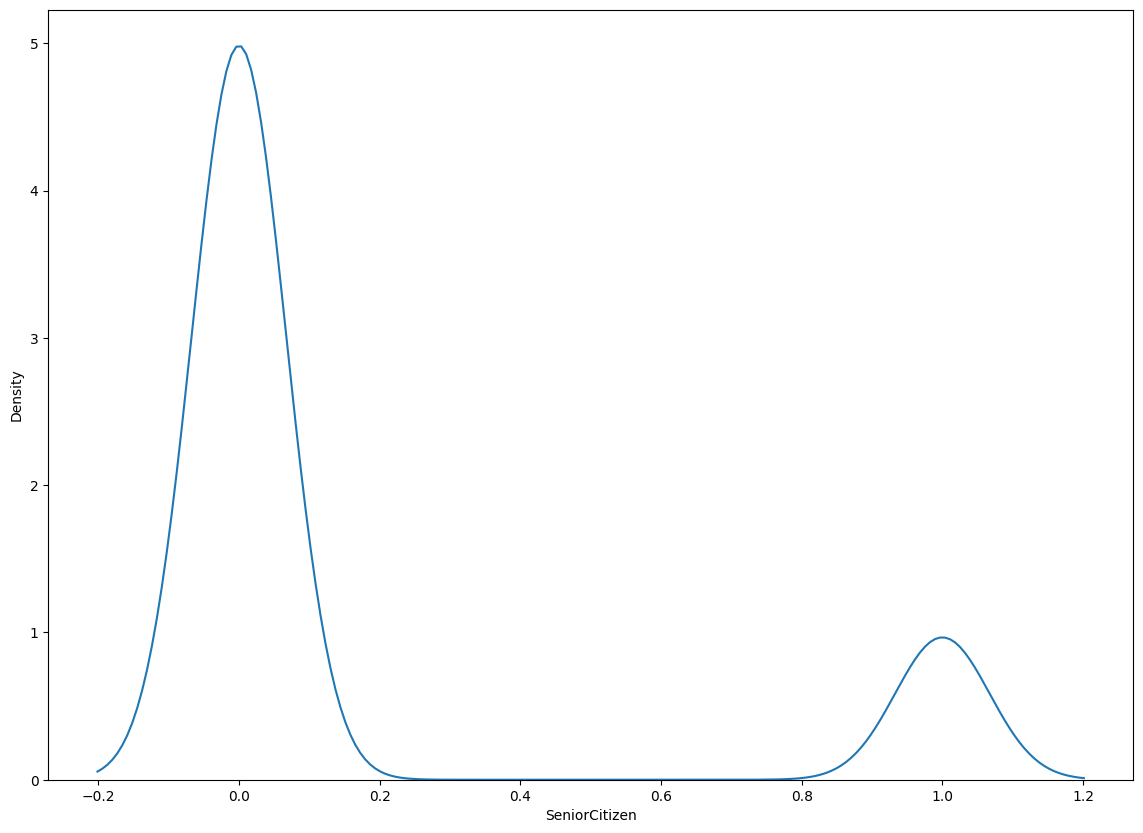

In [21]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['SeniorCitizen'])
plt.grid(False)
plt.show()

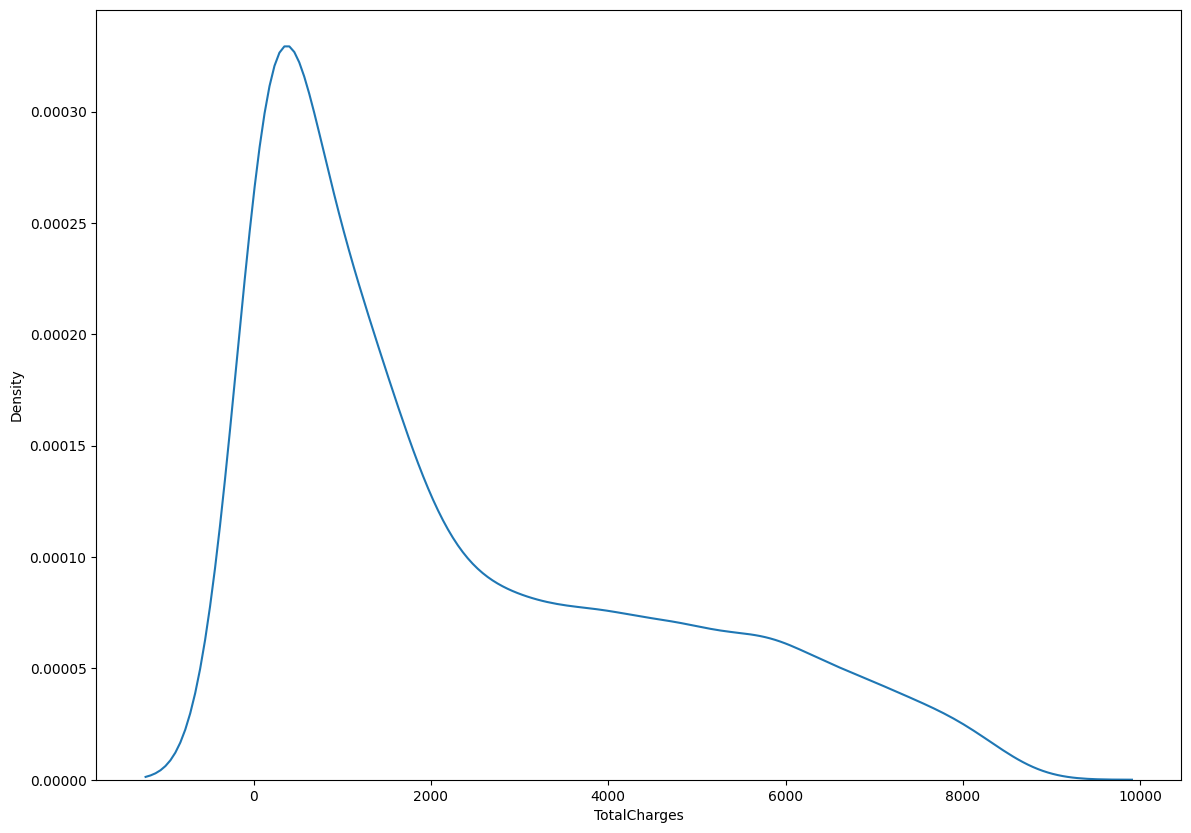

In [22]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['TotalCharges'])
plt.grid(False)
plt.show()

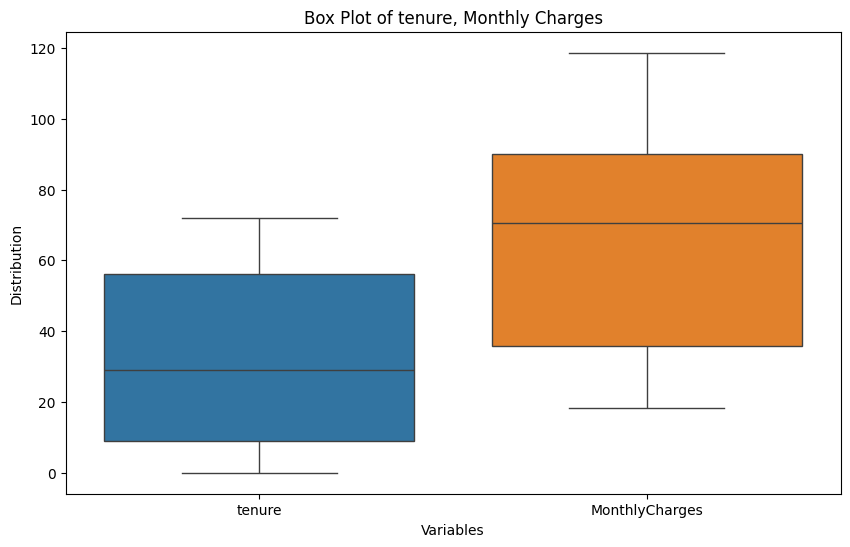

In [23]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['tenure', 'MonthlyCharges']],  whis=1.5)

# Add titles and labels
plt.title('Box Plot of tenure, Monthly Charges')
plt.xlabel('Variables')
plt.ylabel('Distribution')

plt.grid(False)

# Display the plot
plt.show()


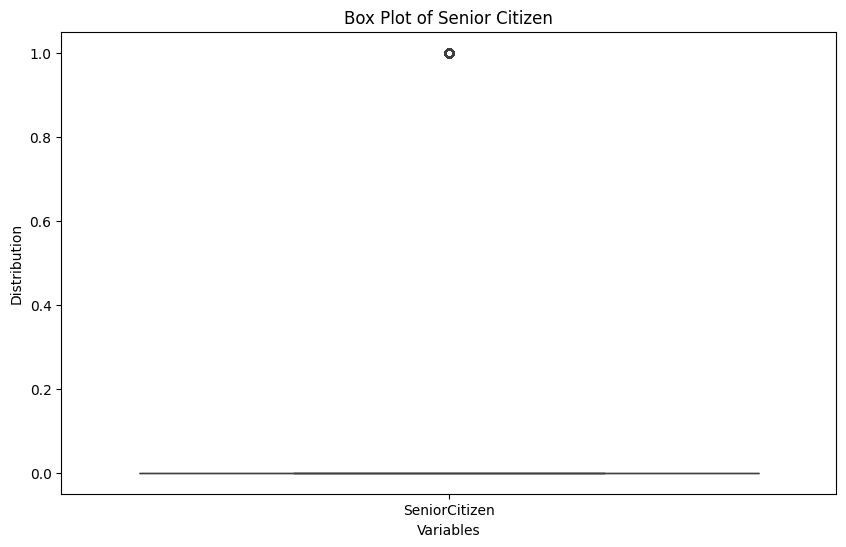

In [24]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['SeniorCitizen']])
 
# Add titles and labels
plt.title('Box Plot of Senior Citizen')
plt.xlabel('Variables')
plt.ylabel('Distribution')
 
plt.grid(False)
 
# Display the plot
plt.show()

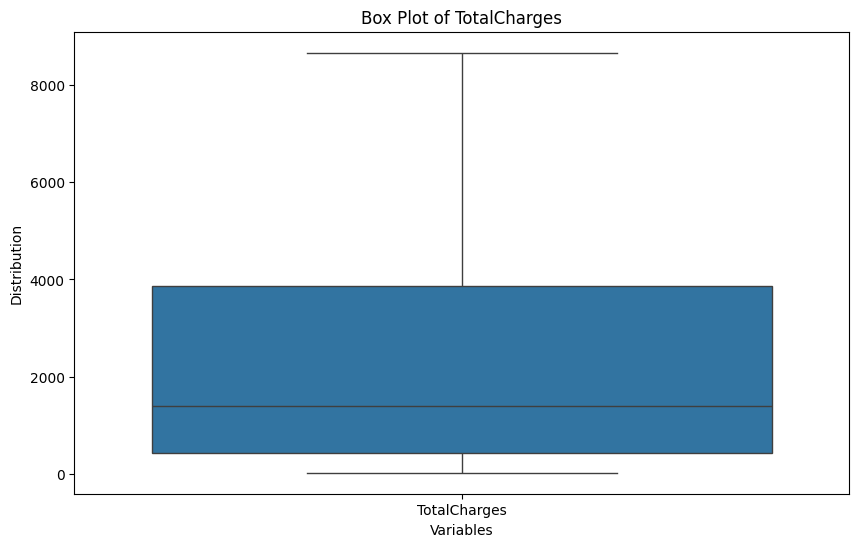

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['TotalCharges']],  whis=4.5)
 
# Add titles and labels
plt.title('Box Plot of TotalCharges')
plt.xlabel('Variables')
plt.ylabel('Distribution')
 
plt.grid(False)
 
# Display the plot
plt.show()

#### **Bivariate Analysis**

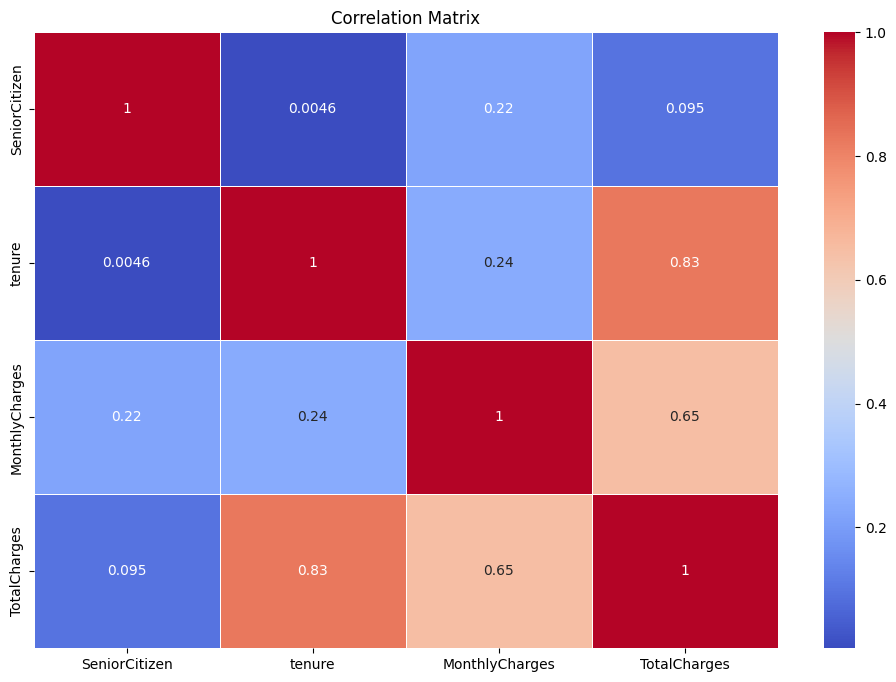

In [26]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

numeric_df = churn_prime.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

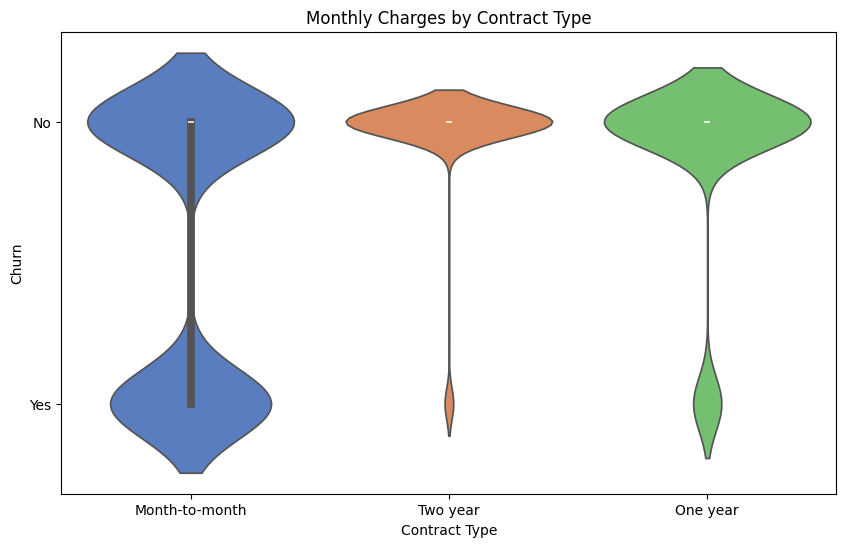

In [27]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='Churn', data=df, palette='muted')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.show()

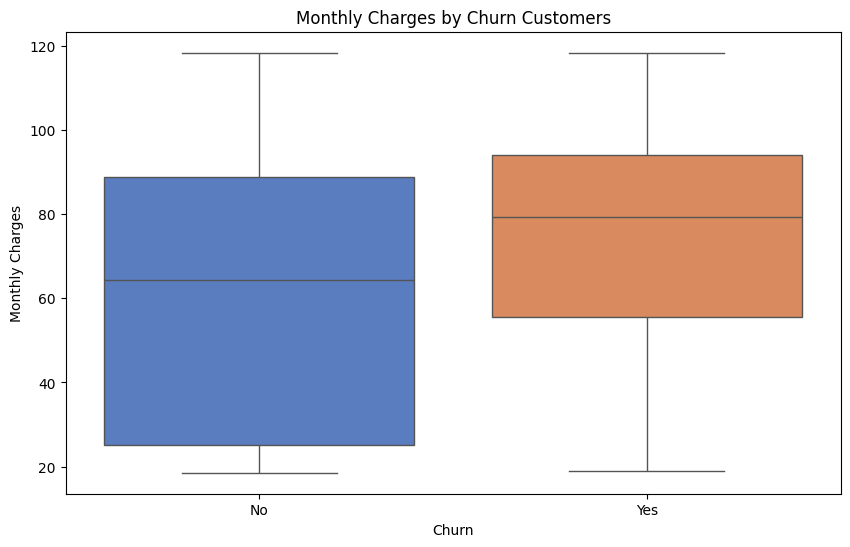

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='muted')
plt.title('Monthly Charges by Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

#### **Maltivariate Analysis**

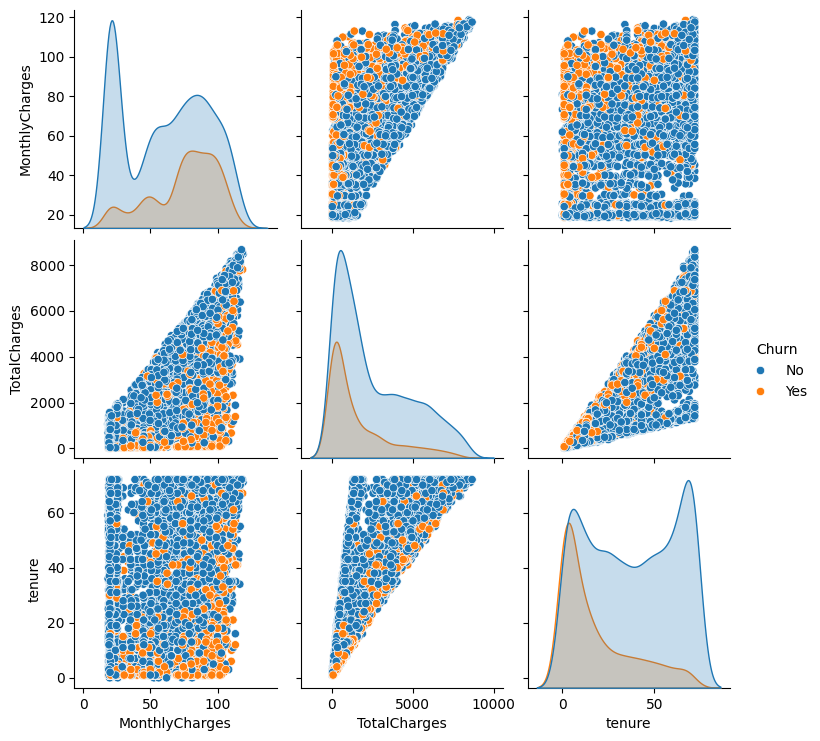

In [29]:
sns.pairplot(churn_prime[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

#### **Distribution and Counts for Categorical variables**

* For the contracts column which will be our focus for the hypothesis we did a bar plot- and realise most customers are on the month to month subscription contract

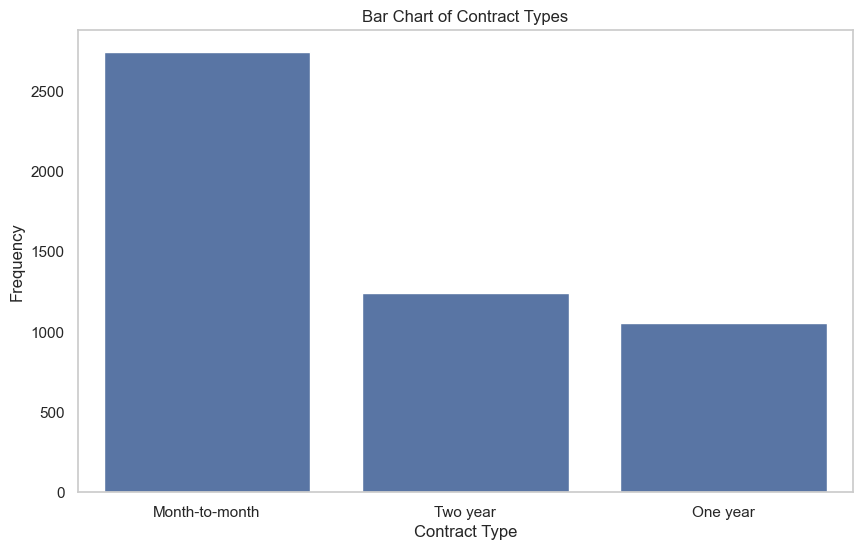

In [30]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='Contract', order=churn_prime['Contract'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

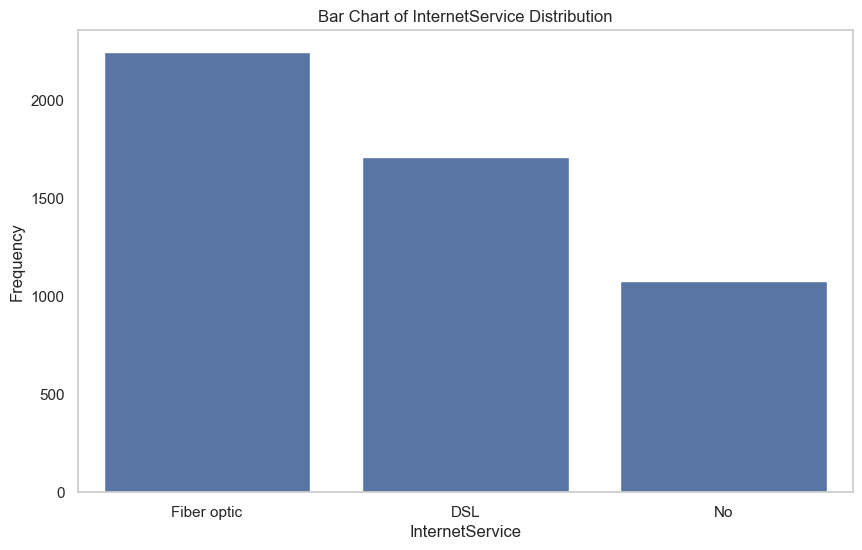

In [31]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='InternetService', order=churn_prime['InternetService'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of InternetService Distribution')
plt.xlabel('InternetService')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

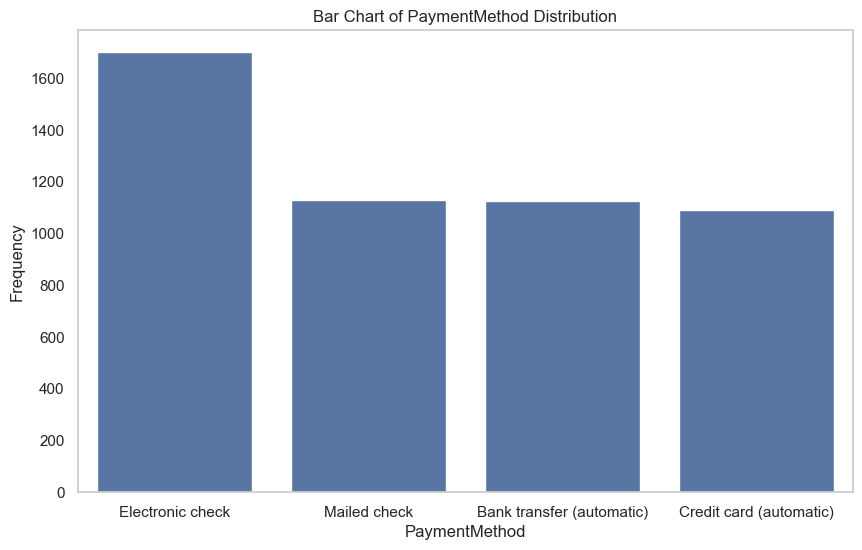

In [32]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='PaymentMethod', order=churn_prime['PaymentMethod'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of PaymentMethod Distribution')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

#### Key Insights 
    - There are no duplicated rows in this dataset
    - Our dataset is not evenly distributed- The mean and the 50th percentile(median) of numerical columns significanly differ. We'll consider this during modeling
    - Data has missing values
    - There are outliers and this can be seen in the long tails of kde plots and hitogram for TotalCharges
    - From categorical coumns
  

#### **Hypothesis Testing**

##### Null Hypothesis
 ##### (HO) There is a significant difference in churn rates among customers with different contract types.
##### Alternative Hpothesis
##### (H1) There is no significant difference in churn rates among customers with different contract types.

In [33]:
# Define the significance level (alpha)
alpha = 0.05
 
# List of contract types
contract_types = ['Month-to-month', 'One year', 'Two year']
 
# Separate the churn rates for the two groups
churn_yes_rate = churn_prime[churn_prime['Churn'] == "Yes"]['Contract'].value_counts(normalize=True)
churn_no_rate = churn_prime[churn_prime['Churn'] == "No"]['Contract'].value_counts(normalize=True)
 
# Perform the t-test for each contract type
for contract in contract_types:
    # Extract the churn rates for the current contract type
    churn_yes = churn_yes_rate.get(contract, 0)
    churn_no = churn_no_rate.get(contract, 0)
    # Since we're dealing with proportions, we need to convert them to counts for the t-test
    n_yes = len(churn_prime[churn_prime['Churn'] == "Yes"])
    n_no = len(churn_prime[churn_prime['Churn'] == "No"])
    # Perform the independent samples t-test (assuming equal variance)
    t_statistic, p_value = stats.ttest_ind_from_stats(
        mean1=churn_yes, std1=(churn_yes * (1 - churn_yes))**0.5, nobs1=n_yes,
        mean2=churn_no, std2=(churn_no * (1 - churn_no))**0.5, nobs2=n_no
    )
    # Print the results for the current contract type
    print(f"Contract Type: {contract}")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    # Check if the p-value is less than alpha to determine the significance
    if p_value < alpha:
        print("Reject the null hypothesis: Contract type has a significant effect on churn rate for this contract type.\n")
    else:
        print("Fail to reject the null hypothesis: Contract type does not have a significant effect on churn rate for this contract type.\n")

Contract Type: Month-to-month
T-Statistic: 32.13341019065162
P-Value: 2.908732291727142e-206
Reject the null hypothesis: Contract type has a significant effect on churn rate for this contract type.

Contract Type: One year
T-Statistic: -12.551018196634514
P-Value: 1.3308162954096737e-35
Reject the null hypothesis: Contract type has a significant effect on churn rate for this contract type.

Contract Type: Two year
T-Statistic: -23.330005442513844
P-Value: 2.0956920631358458e-114
Reject the null hypothesis: Contract type has a significant effect on churn rate for this contract type.



### **Data Preparation**

#### Handling misssing values 

In [34]:
churn_prime['TotalCharges'].fillna(churn_prime['TotalCharges'].median(), inplace=True) # TotalCharges column


In [35]:
miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',                   #For missing values in categorical columns 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Churn']

for col in miss_categ:
    mode_val = churn_prime[col].mode()[0]                                      
    churn_prime[col].fillna(mode_val, inplace=True)

##### Drop the Cutomer Id Column it doe not have any statistical  or computational significance and has too many unknown categories  that will affect the encoding process

In [36]:
churn_prime = churn_prime.drop('customerID', axis=1)

In [37]:
churn_prime.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

####  Split data to X and y (Input and Output variables )

In [39]:
# Input variables

X= churn_prime.drop ('Churn', axis= 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [40]:
# Output variable / target variable 
y= churn_prime['Churn']
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [41]:
(X.shape, y.shape) 

((5043, 19), (5043,))

#### Split data to categorical and numerical columns

In [42]:
numerical_columns= X.select_dtypes('number').columns
numerical_columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [43]:
categorical_columns= X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4034, 19), (4034,)), ((1009, 19), (1009,)))

In [45]:
# We use a lable encoder for y because its not a 2 dimentional array 

encoder = LabelEncoder()

# Fit the encoder to the target variable
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded= encoder.transform(y_test)


#### *Pipeline*

In [46]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2300.633691,2267.965879,18.799999,418.000,1401.150024,3857.575073,8670.100000


In [47]:
X


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000


In [48]:
X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [49]:
numeric_pipeline= Pipeline(steps=[ 
    ('scaler', RobustScaler()),
    ('QuantileTransformation', QuantileTransformer ()),
])

categorical_pipeline= Pipeline([
   ('encoder', OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),

])

In [50]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('QuantileTransformation',
                                                  QuantileTransformer())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

#### **Modeling & Evaluation**

In [56]:
#Summarize the selection of models for churn prediction
models= [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(algorithm='auto')), 
    ('SVM', SVC(C=1.0)), #controls the trade-off between maximizing the margin and minimizing the classification error
    ('GBM', GradientBoostingClassifier ),
   
]

In [61]:
# Loop over models
for model_name, classifier in models:
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate model performance
    print (model_name)
    print (classification_report( y_test_encoded, y_pred))
    print ('=' * 50)


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       742
           1       0.45      0.54      0.49       267

    accuracy                           0.70      1009
   macro avg       0.63      0.65      0.64      1009
weighted avg       0.72      0.70      0.71      1009

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.63      0.53      0.58       267

    accuracy                           0.79      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.78   

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

#### Answering Analytical Questions 

In [ ]:
  #1. What is the Churn percentage based on the paymment method 

churn_percentage = data.groupby('PaymentMethod')['Churn'].mean() * 100 
churn_percentage = churn_percentage.reset_index()
churn_percentage.columns = ['PaymentMethod', 'ChurnPercentage']
print(churn_percentage)


# Create a bar plot of churn percentage by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='ChurnPercentage', data=churn_percentage)

# Add title and labels
plt.title('Churn Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.grid(False)

# Show plot
plt.show()


In [ ]:
 #2. How does key demographic factors (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') influence customer churn?


# Define the demographic features
demographic_features = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# Plotting the churn rates for each demographic feature
plt.figure(figsize=(14, 10))

for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    churn_rates = data.groupby(feature)['Churn'].mean() * 100
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate (%)')
    plt.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
#6. How do different contract types affect customer churn?

# Plotting the count of churn for each contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_prime, x='Contract', hue='Churn', palette='muted')
plt.title('Comparison of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
 #3. How does the tenure of a customer impact their likelihood of churning?


np.random.seed(0) #enuring the starting point is the same every time
n_customers = 1000 # Setting a sumple for number if customers we are working with in this particular graph
tenure_months = np.random.randint(1, 36, size=n_customers) #Generate tenure data to ensure we simulate the number of months the customer has been 
churn_prob = np.clip(0.05 * tenure_months, 0, 0.8)  # Calculate churn probability
churned = np.random.random(size=n_customers) < churn_prob # Generating churn data
churn_prime = pd.DataFrame({'tenure': tenure_months, 'Churn': churned}) # Create a dataframe with the generated tenure and churn data

# Define tenure buckets 
tenure_bins = [0, 6, 12, 18, 24, 30, 36]
tenure_labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36']

# Assign each customer to a tenure bucket
churn_prime['tenure_bucket'] = pd.cut(churn_prime['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calculate churn rates for each tenure bucket
churn_rates = churn_prime.groupby('tenure_bucket')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()


In [ ]:
 #4. Is there a significant correlation between the type of internet service and customer churn?

from scipy.stats import chi2_contingency
# Data generation 
np.random.seed(0)
data = pd.DataFrame({
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=1000),
    'Churn': np.random.choice([0, 1], size=1000)
})

# Calculate churn rates by internet service type
churn_rates = data.groupby('InternetService')['Churn'].mean() * 100

# Perform chi-square test
contingency_table = pd.crosstab(data['InternetService'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print chi-square test results
print(f'Chi2 Statistic: {chi2}')
print(f'P-Value: {p}')

# Plot churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

# Interpretation
if p < 0.05:
    print("There is a significant association between Internet Service Type and Churn (p < 0.05).")
else:
    print("There is no significant association between Internet Service Type and Churn (p >= 0.05).")


In [ ]:
#5. Do customers with multiple services show different churn rates compared to those with  fewer services?

# Data generation 
np.random.seed(0)
n_customers = 1000
data = pd.DataFrame({
    'PhoneService': np.random.choice(['Yes', 'No'], size=n_customers),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_customers),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], size=n_customers),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'Churn': np.random.choice([0, 1], size=n_customers)
})

# Define a function to count the number of services a customer has
def count_services(row):
    services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    count = 0
    for service in services:
        if row[service] in ['Yes', 'DSL', 'Fiber optic']:
            count += 1
    return count

# Create a new column for the number of services
data['NumberOfServices'] = data.apply(count_services, axis=1)

# Calculate churn rates by number of services
churn_rates = data.groupby('NumberOfServices')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()


In [ ]:
#from sklearn.impute import SimpleImputer #filling mising values

# For categorical features, use the most frequent value
#categorical_imputer = SimpleImputer(strategy='most_frequent')

# For numerical features, use the median
#numerical_imputer = SimpleImputer(strategy='median')

In [ ]:
# Inspect data 
#churn_prime.isnull().sum()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder #Encoding

#categorical_encoder = OneHotEncoder(handle_unknown='ignore')


In [ ]:
#from sklearn.preprocessing import StandardScaler #Standardizing our data 

#numerical_scaler = StandardScaler()


In [ ]:
#from sklearn.pipeline import Pipeline # Create a preprocesing pipeline 

#categorical_pipeline = Pipeline([
   # ('imputer', categorical_imputer),
    #('encoder', categorical_encoder)
#])

#numerical_pipeline = Pipeline([
   # ('imputer', numerical_imputer),
    #('scaler', numerical_scaler)
#])


In [ ]:
#from sklearn.compose import ColumnTransformer # Combine our pipelines 

#preprocessor = ColumnTransformer([
    #('cat', categorical_pipeline, categorical_features),
    #('num', numerical_pipeline, numerical_features)
#])


In [ ]:
#from sklearn.ensemble import RandomForestClassifier # Build the final pipeline with  a ml model

#model = Pipeline([
    #('preprocessor', preprocessor),
   # ('classifier', RandomForestClassifier())
#])


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #train and evaluate the model 

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)

# Evaluate the model
#print('Accuracy:', accuracy_score(y_test, y_pred))
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
#print('Classification Report:\n', classification_report(y_test, y_pred))


#### Checklist 
    - Missing values are handled 
    - True to yes and false to no 
    - Column names renaming 
    - Monthlycharge and Totalcharge columns need standardized decimals
    - Total charges column should be a float datatype
    - At least 5 Univariate Bivariate Multivariate Analysis 
    - Categorical columns analysis 
    - Hypothesis 
    - Visuals should check colinearity  Churn rate distribution
    - Analytical Questions 
    - Atleast 4 models
    - Evaluation
    - Choose 1 model - key metrics must be met 
    - Hyperparameter tuning must 
    - Predict test set and visualize resulst
    - Ensure to highlight at least 5 key insights, challanges and way forward 
    - Must have a conclusion